# Handwritten Digits - MNIST GAN With Improved Training

Make Your First GAN With PyTorch, 2020

In [32]:
from rich import print

## import libraries

In [33]:
import random
import torch
import torch.nn as nn

import pandas as pd 
import numpy
import matplotlib.pyplot as plt

import dill as pickle

## Dataset Class

In [34]:
import mnist_data

In [35]:
# load training data

train_csv = mnist_data.datadir.joinpath('mnist_train.csv')
mnist_dataset = mnist_data.MnistDataset(train_csv)

## Data Functions

In [36]:
# functions to generate random data

def generate_random_image(size):
    random_data = torch.rand(size)
    return random_data


def generate_random_seed(size):
    random_data = torch.randn(size)
    return random_data

## Discriminator Network

In [37]:
from mnist_classifier import Classifier as Discriminator

model = nn.Sequential(
    nn.Linear(784, 200),
    nn.LeakyReLU(0.02),

    nn.LayerNorm(200),

    nn.Linear(200, 1),
    nn.Sigmoid()
)

D = Discriminator(model)
D.loss_function = nn.BCELoss()
D.optimiser = torch.optim.Adam(D.parameters(), lr=0.0001)

In [38]:
print(f"{D.model = }")
print(f'{D.loss_function = }')
print(f'{D.optimiser = }')

D.model = Sequential(
  (0): Linear(in_features=784, out_features=200, bias=True)
  (1): LeakyReLU(negative_slope=0.02)
  (2): LayerNorm((200,), eps=1e-05, elementwise_affine=True)
  (3): Linear(in_features=200, out_features=1, bias=True)
  (4): Sigmoid()
)

D.loss_function = BCELoss()

D.optimiser = Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0001
    weight_decay: 0
)

## Test Discriminator

In [39]:
%%time
# test discriminator can separate real data from random noise

for label, image_data_tensor, target_tensor in mnist_dataset:
    # real data
    D.train(image_data_tensor, torch.FloatTensor([1.0]), print_counter=True)
    # fake data
    D.train(generate_random_image(784), torch.FloatTensor([0.0]), print_counter=True)

counter =  10000

counter =  20000

counter =  30000

counter =  40000

counter =  50000

counter =  60000

counter =  70000

counter =  80000

counter =  90000

counter =  100000

counter =  110000

counter =  120000

CPU times: user 1h 40min 42s, sys: 1h 44min 7s, total: 3h 24min 49s
Wall time: 14min 6s


<Figure size 1152x576 with 1 Axes>

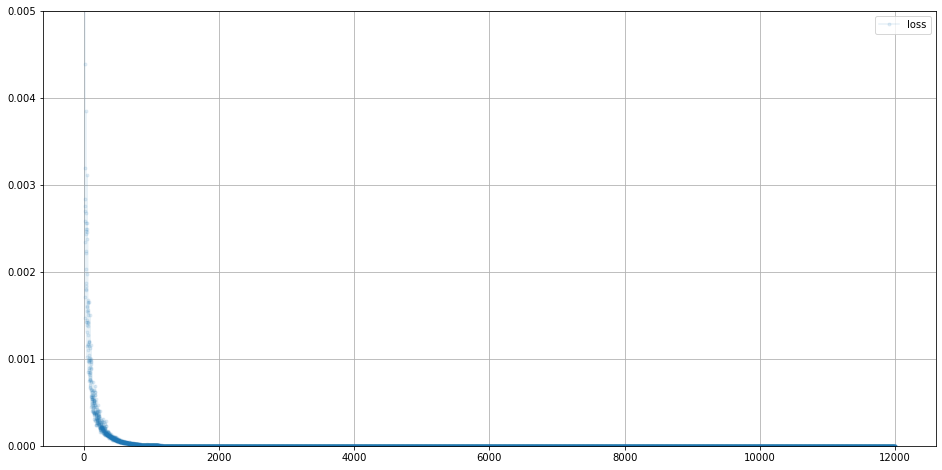

In [40]:
# plot discriminator loss

# D.plot_progress()
D.plot_progress(ylim=(0, 0.005))

In [41]:
# manually run discriminator to check it can tell real data from fake

for i in range(4):
    image_data_tensor = mnist_dataset[random.randint(0, 60000)][1]
    print(f"{D.forward(image_data_tensor).item():.3f}")

for i in range(4):
    print(f"{D.forward(generate_random_image(784)).item():.2e}")

1.000

1.000

1.000

1.000

9.12e-12

1.01e-11

8.48e-12

8.33e-12

## Generator Network

In [42]:
from mnist_generator import Generator

gmodel = nn.Sequential(
    nn.Linear(100, 200),
    nn.LeakyReLU(0.02),

    nn.LayerNorm(200),

    nn.Linear(200, 784),
    nn.Sigmoid()
)

G = Generator(gmodel)
G.optimiser = torch.optim.Adam(G.parameters(), lr=0.0001)

In [43]:
print(f"{G.model = }")
print(f'{G.optimiser = }')

G.model = Sequential(
  (0): Linear(in_features=100, out_features=200, bias=True)
  (1): LeakyReLU(negative_slope=0.02)
  (2): LayerNorm((200,), eps=1e-05, elementwise_affine=True)
  (3): Linear(in_features=200, out_features=784, bias=True)
  (4): Sigmoid()
)

G.optimiser = Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0001
    weight_decay: 0
)

## Test Generator Output

<matplotlib.image.AxesImage object at 0x7f749c2fff10>

<Figure size 432x288 with 1 Axes>

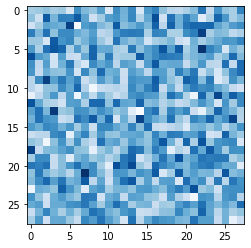

In [44]:
# check the generator output is of the right type and shape

output = G.forward(generate_random_seed(100))

img = output.detach().numpy().reshape(28,28)

plt.imshow(img, interpolation='none', cmap='Blues')

## Train GAN

In [45]:
%%time 

# create Discriminator and Generator

D = Discriminator(model)
D.loss_function = nn.BCELoss()
D.optimiser = torch.optim.Adam(D.parameters(), lr=0.0001)

G = Generator(gmodel)
G.optimiser = torch.optim.Adam(G.parameters(), lr=0.0001)

# train Discriminator and Generator

epochs = 4
# epochs = 8

for epoch in range(epochs):
    print(f'Starting epoch {epoch} of {epochs}')
    for label, image_data_tensor, target_tensor in mnist_dataset:

        # train discriminator on true
        D.train(image_data_tensor, torch.FloatTensor([1.0]), print_counter=True)

        # train discriminator on false
        # use detach() so gradients in G are not calculated
        D.train(G.forward(generate_random_seed(100)).detach(), torch.FloatTensor([0.0]), print_counter=True)
#         D.train(G.forward(generate_random_image(100)).detach(), torch.FloatTensor([0.0]), print_counter=True)

        # train generator
        G.train(D, generate_random_seed(100), torch.FloatTensor([1.0]))

Starting epoch 0 of 4

counter =  10000

counter =  20000

counter =  30000

counter =  40000

counter =  50000

counter =  60000

counter =  70000

counter =  80000

counter =  90000

counter =  100000

counter =  110000

counter =  120000

Starting epoch 1 of 4

counter =  130000

counter =  140000

counter =  150000

counter =  160000

counter =  170000

counter =  180000

counter =  190000

counter =  200000

counter =  210000

counter =  220000

counter =  230000

counter =  240000

Starting epoch 2 of 4

counter =  250000

counter =  260000

counter =  270000

counter =  280000

counter =  290000

counter =  300000

counter =  310000

counter =  320000

counter =  330000

counter =  340000

counter =  350000

counter =  360000

Starting epoch 3 of 4

counter =  370000

counter =  380000

counter =  390000

counter =  400000

counter =  410000

counter =  420000

counter =  430000

counter =  440000

counter =  450000

counter =  460000

counter =  470000

counter =  480000

CPU times: user 11h 28min 45s, sys: 10h 14min 8s, total: 21h 42min 53s
Wall time: 1h 29min 40s


<Figure size 1152x576 with 1 Axes>

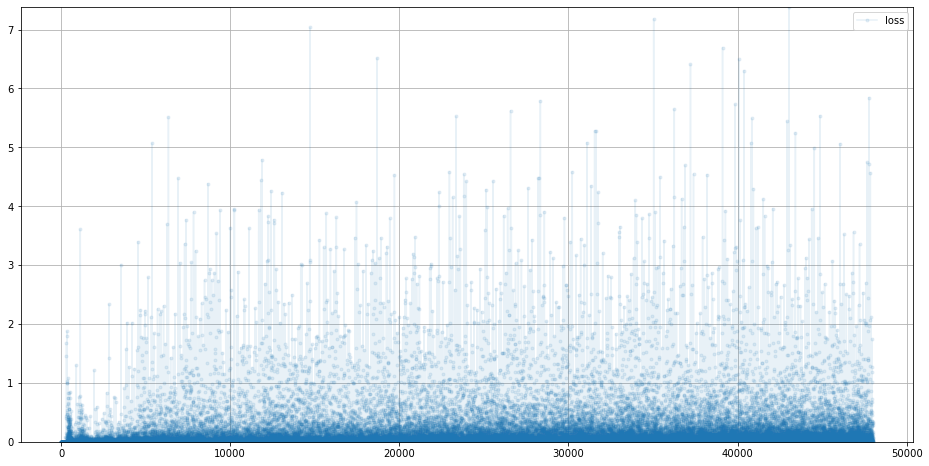

In [46]:
# plot discriminator error

# D.plot_progress(yticks=(0, 0.25, 0.5, 5))
D.plot_progress()

<Figure size 1152x576 with 1 Axes>

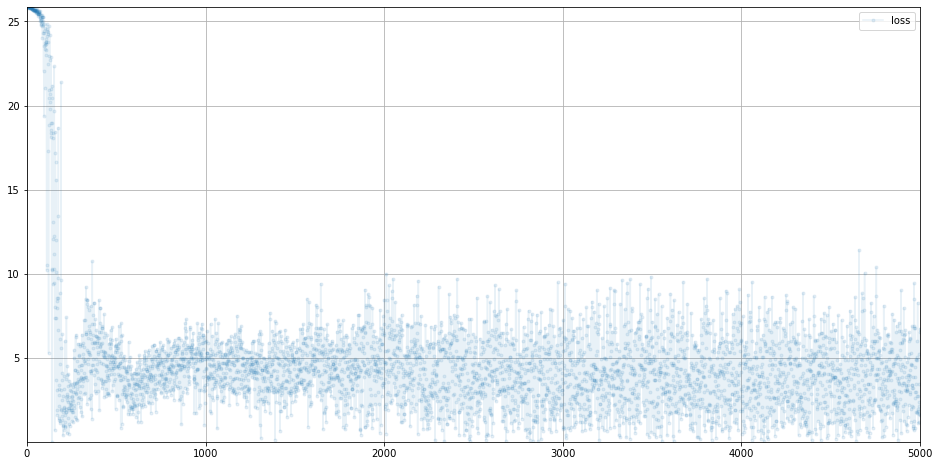

In [47]:
# plot generator error

# G.plot_progress(yticks=(0, 0.25, 0.5, 5))
G.plot_progress(xlim=(0, 5000))

## Run Generator

<Figure size 1152x576 with 6 Axes>

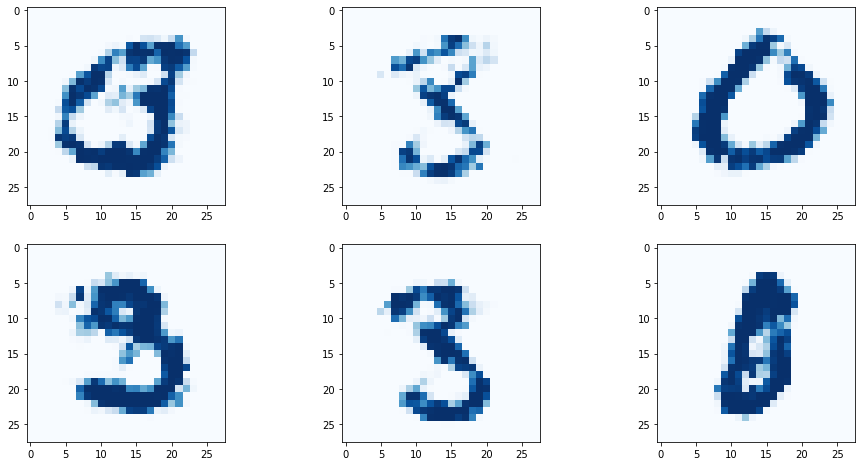

In [63]:
# plot several outputs from the trained generator

# plot a 3 column, 2 row array of generated images
f, axarr = plt.subplots(2,3, figsize=(16,8))
for i in range(2):
    for j in range(3):
        output = G.forward(generate_random_seed(100))
        img = output.detach().numpy().reshape(28, 28)
        axarr[i,j].imshow(img, interpolation='none', cmap='Blues')

## Seed Experiments

<matplotlib.image.AxesImage object at 0x7f74de4bef10>

<Figure size 432x288 with 1 Axes>

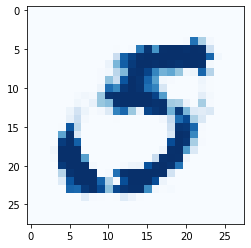

In [67]:
seed1 = generate_random_seed(100)
out1 = G.forward(seed1)
img1 = out1.detach().numpy().reshape(28,28)
plt.imshow(img1, interpolation='none', cmap='Blues')

<matplotlib.image.AxesImage object at 0x7f749c733700>

<Figure size 432x288 with 1 Axes>

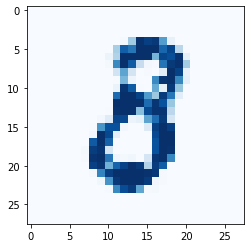

In [72]:
seed2 = generate_random_seed(100)
out2 = G.forward(seed2)
img2 = out2.detach().numpy().reshape(28,28)
plt.imshow(img2, interpolation='none', cmap='Blues')

<Figure size 1152x576 with 12 Axes>

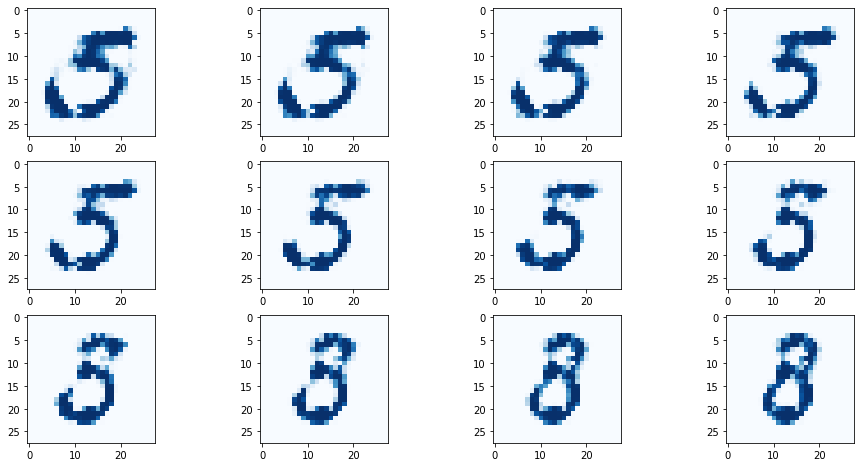

In [73]:
# plot several outputs from the trained generator

count = 0

# plot a 3 column, 2 row array of generated images
f, axarr = plt.subplots(3,4, figsize=(16,8))
for i in range(3):
    for j in range(4):
        seed = seed1 + (seed2 - seed1)/11 * count
        output = G.forward(seed)
        img = output.detach().numpy().reshape(28,28)
        axarr[i,j].imshow(img, interpolation='none', cmap='Blues')
        count = count + 1

<matplotlib.image.AxesImage object at 0x7f74dd9dd340>

<Figure size 432x288 with 1 Axes>

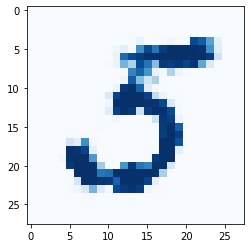

In [75]:
# sum of seeds

seed3 = seed1 + seed2
out3 = G.forward(seed3)
img3 = out3.detach().numpy().reshape(28,28)
plt.imshow(img3, interpolation='none', cmap='Blues')

<matplotlib.image.AxesImage object at 0x7f747c4dc8e0>

<Figure size 432x288 with 1 Axes>

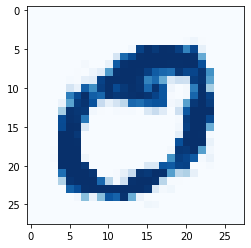

In [76]:
# difference of seeds

seed4 = seed1 - seed2
out4 = G.forward(seed4)
img4 = out4.detach().numpy().reshape(28,28)
plt.imshow(img4, interpolation='none', cmap='Blues')

<matplotlib.image.AxesImage object at 0x7f74de3a7580>

<Figure size 432x288 with 1 Axes>

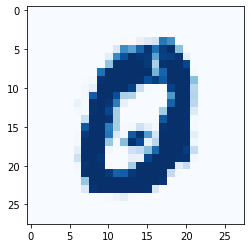

In [77]:
# difference of seeds

seed4 = seed1 * seed2
out4 = G.forward(seed4)
img4 = out4.detach().numpy().reshape(28,28)
plt.imshow(img4, interpolation='none', cmap='Blues')

## pickle and save GAN

In [78]:
D.pickle('discriminator_mnist.pkl')
G.pickle('generator_mnist.pkl')

In [79]:
gan = dict(discriminator=D, generator=G)

with open('gan_mnist.pkl', 'wb') as f:
    pickle.dump(gan, f)

## load from pickled GAN

In [80]:
with open('discriminator_mnist.pkl', 'rb') as f:
    Dn = pickle.load(f)
    
with open('generator_mnist.pkl', 'rb') as f:
    Gn = pickle.load(f)

<Figure size 1152x576 with 6 Axes>

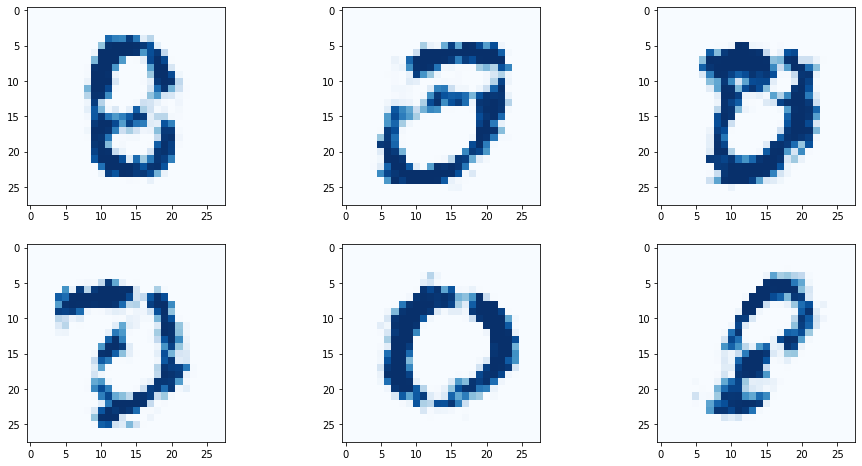

In [81]:
f, axarr = plt.subplots(2,3, figsize=(16,8))
for i in range(2):
    for j in range(3):
        output = Gn.forward(generate_random_seed(100))
        img = output.detach().numpy().reshape(28, 28)
        axarr[i,j].imshow(img, interpolation='none', cmap='Blues')

In [82]:
with open('gan_mnist.pkl', 'rb') as f:
    new_gan = pickle.load(f)

<matplotlib.image.AxesImage object at 0x7f74ddbc32e0>

<Figure size 432x288 with 1 Axes>

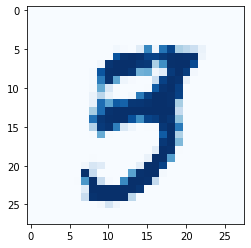

In [83]:
output = new_gan['generator'].forward(generate_random_seed(100))
img = output.detach().numpy().reshape(28, 28)
plt.imshow(img, interpolation='none', cmap='Blues')